# Import Libraries

In [1]:
import numpy as np
import pandas as pd 

# Load Data

In [2]:
df = pd.read_csv('UAH_driveset_merged_27_jan.csv')
df = df.iloc[:,2:] # dropping index and timestamps

# Replacing Missing Values

In [3]:
#check for missing values
df.isnull().sum().sort_values(ascending = False).head(3)

Boolean of system activated (1 if >50km/h)    1021
GPS speed (km/h) [same as in RAW GPS]]           0
Roll (degrees)                                   0
dtype: int64

In [4]:
#if speed > 50, change boolean to 1, otherwise 0
count = 0
index_missing = np.where(df['Boolean of system activated (1 if >50km/h)'].isnull() == True)

for i in range(len(index_missing[0])):
    if df['Speed (km/h)'][index_missing[0][i]] >= 50:
        df['Boolean of system activated (1 if >50km/h)'][index_missing[0][i]] = 1
    elif df['Speed (km/h)'][index_missing[0][i]] <= 50:
        df['Boolean of system activated (1 if >50km/h)'][index_missing[0][i]] = 0

#Convert to integer
df['Boolean of system activated (1 if >50km/h)'] = df['Boolean of system activated (1 if >50km/h)'].astype('int64')

<ipython-input-4-d69acad28411>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Boolean of system activated (1 if >50km/h)'][index_missing[0][i]] = 1
<ipython-input-4-d69acad28411>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Boolean of system activated (1 if >50km/h)'][index_missing[0][i]] = 0


# Delete Duplicated Columns

In [5]:
df.columns.sort_values()

Index(['Acceleration in X (Gs)', 'Acceleration in X filtered by KF (Gs)',
       'Acceleration in Y (Gs)', 'Acceleration in Y filtered by KF (Gs)',
       'Acceleration in Z (Gs)', 'Acceleration in Z filtered by KF (Gs)',
       'Altitude (meters)', 'Behavior',
       'Boolean of system activated (1 if >50km/h)', 'Course (degrees)',
       'Difcourse: course variation (degrees)',
       'Distance to ahead vehicle in current lane (meters) [value -1 means no car is detected in front]',
       'Estimated current lane (1=right lane, 2=first left lane, 3=second left lane, etc) [experimental]',
       'GPS Latitude used to query OSM (degrees)',
       'GPS Longitude used to query OSM (degrees)',
       'GPS speed (km/h) [same as in RAW GPS]',
       'GPS speed (km/h) [same as in RAW GPS]]',
       'Horizontal accuracy (degrees)', 'Latitude coordinate (degrees)',
       'Longitude coordinate (degrees)',
       'Maximum allowed speed of current road (km/h)',
       'Number of detected vehicles

In [6]:
df = df.drop(columns = ['GPS speed (km/h) [same as in RAW GPS]'])
df = df.drop(columns = ['GPS speed (km/h) [same as in RAW GPS]]'])
df.shape

(30929, 34)

# Drop Error / Wrong Values

### Find Latitude & Longitude Coordinate Problems, delete query to OSM

In [7]:
df['Latitude difference'] = df['Latitude coordinate (degrees)']-df['GPS Latitude used to query OSM (degrees)']
index = df[df['Latitude difference']>1].index.values
df[['Latitude coordinate (degrees)','GPS Latitude used to query OSM (degrees)']].iloc[index]

,Latitude coordinate (degrees),GPS Latitude used to query OSM (degrees)
11411,40.505703,0.0
11412,40.505714,0.0
11413,40.505730,0.0
11414,40.505745,0.0
11415,40.505768,0.0
...,...,...
29961,40.502159,0.0
29962,40.502022,0.0
29963,40.501888,0.0
29964,40.501755,0.0


In [8]:
df['Longitude difference'] = df['Longitude coordinate (degrees)']-df['GPS Longitude used to query OSM (degrees)']
index = df[df['Longitude difference']>1].index.values
df[['Longitude coordinate (degrees)','GPS Longitude used to query OSM (degrees)']].iloc[index]

,Longitude coordinate (degrees),GPS Longitude used to query OSM (degrees)


In [9]:
df = df.drop(columns = ['Latitude difference'])
df = df.drop(columns = ['Longitude difference'])
df = df.drop(columns = ['GPS Latitude used to query OSM (degrees)'])
df = df.drop(columns = ['GPS Longitude used to query OSM (degrees)'])
df.shape

(30929, 32)

### Compare acceleration in X, Y, Z axis, delete unfiltered acceleration

In [10]:
df['Acceleration in X difference'] = df['Acceleration in X (Gs)']-df['Acceleration in X filtered by KF (Gs)']
abs(df['Acceleration in X difference']).sort_values(ascending = False)

28400    0.291
30162    0.239
11197    0.205
28060    0.202
30067    0.188
         ...  
22553    0.000
10599    0.000
18486    0.000
22539    0.000
6615     0.000
Name: Acceleration in X difference, Length: 30929, dtype: float64

In [11]:
index = df[df['Acceleration in X difference']>0.2].index.values
df[['Acceleration in X (Gs)','Acceleration in X filtered by KF (Gs)']].iloc[index]

,Acceleration in X (Gs),Acceleration in X filtered by KF (Gs)
28060,0.194,-0.008
30162,0.276,0.037


In [12]:
df['Acceleration in Y difference'] = df['Acceleration in Y (Gs)']-df['Acceleration in Y filtered by KF (Gs)']
abs(df['Acceleration in Y difference']).sort_values(ascending = False)

28693    0.120
26453    0.116
26456    0.111
27606    0.105
30433    0.104
         ...  
30231    0.000
17771    0.000
3139     0.000
19147    0.000
1118     0.000
Name: Acceleration in Y difference, Length: 30929, dtype: float64

In [13]:
index = df[df['Acceleration in Y difference']>0.1].index.values
df[['Acceleration in Y (Gs)','Acceleration in Y filtered by KF (Gs)']].iloc[index]

,Acceleration in Y (Gs),Acceleration in Y filtered by KF (Gs)
26456,0.096,-0.015
27383,0.206,0.105
28669,0.113,0.011
30433,0.084,-0.020


In [14]:
df['Acceleration in Z difference'] = df['Acceleration in Z (Gs)']-df['Acceleration in Z filtered by KF (Gs)']
abs(df['Acceleration in Z difference']).sort_values(ascending = False)

4602     0.244
28400    0.181
23153    0.147
23790    0.133
20158    0.130
         ...  
19672    0.000
3267     0.000
10614    0.000
6266     0.000
16839    0.000
Name: Acceleration in Z difference, Length: 30929, dtype: float64

In [15]:
index = df[df['Acceleration in Z difference']>0.1].index.values
df[['Acceleration in Z (Gs)','Acceleration in Z filtered by KF (Gs)']].iloc[index]

,Acceleration in Z (Gs),Acceleration in Z filtered by KF (Gs)
4602,-0.097,-0.341
21089,0.005,-0.118
22937,0.119,0.001
23153,0.160,0.013
23790,-0.256,-0.389
24164,-0.003,-0.121
24259,-0.180,-0.301
28060,0.159,0.039


#### Remove Acceleration, use acceleration filtered

In [16]:
df = df.drop(columns = ['Acceleration in X difference'])
df = df.drop(columns = ['Acceleration in Y difference'])
df = df.drop(columns = ['Acceleration in Z difference'])
df = df.drop(columns = ['Acceleration in X (Gs)'])
df = df.drop(columns = ['Acceleration in Y (Gs)'])
df = df.drop(columns = ['Acceleration in Z (Gs)'])
df.shape

(30929, 29)

### Speed Variable (Drop Rows below 17 km/h)

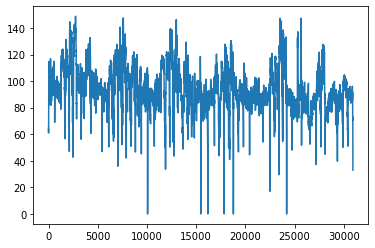

In [17]:
df['Speed (km/h)'].plot()

In [18]:
index = df[df['Speed (km/h)'] < 17].index.values

In [19]:
df = df.drop(index)
df

,Speed (km/h),Latitude coordinate (degrees),Longitude coordinate (degrees),Altitude (meters),Vertical accuracy (degrees),Horizontal accuracy (degrees),Course (degrees),Difcourse: course variation (degrees),Boolean of system activated (1 if >50km/h),Acceleration in X filtered by KF (Gs),...,Distance to ahead vehicle in current lane (meters) [value -1 means no car is detected in front],Time of impact to ahead vehicle (seconds) [distance related to own speed],Number of detected vehicles in this frame (traffic),Maximum allowed speed of current road (km/h),"Reliability of obtained maxspeed (0=unknown, 1=reliable, 2=used previously obtained maxspeed,3=estimated by type of road)","Type of road (motorway, trunk, secondary...)",Number of lanes in current road,"Estimated current lane (1=right lane, 2=first left lane, 3=second left lane, etc) [experimental]",OSM delay to answer query (seconds),Behavior
0,64.5,40.512924,-3.404577,612.5,4,5,331.9,0.000,1,-0.030,...,18.13,1.01,3,60.0,1,tertiary,2,1,0.869,NORMAL
1,63.6,40.513065,-3.404680,612.9,4,5,330.8,1.055,1,0.026,...,13.35,0.76,3,60.0,1,tertiary,2,1,0.869,NORMAL
2,62.2,40.513210,-3.404772,613.3,4,5,330.8,1.055,1,-0.021,...,13.50,0.78,2,60.0,1,tertiary,2,1,0.869,NORMAL
3,60.9,40.513348,-3.404868,613.5,3,5,330.1,0.703,1,0.025,...,15.12,0.89,1,60.0,1,tertiary,2,1,0.869,NORMAL
4,61.2,40.513477,-3.404971,613.8,3,5,329.4,1.406,1,0.014,...,15.55,0.91,1,60.0,1,tertiary,2,1,0.869,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30924,50.7,40.505379,-3.355696,599.8,3,5,98.1,0.703,1,-0.017,...,64.88,4.61,1,90.0,1,motorway_link,2,1,2.848,NORMAL
30925,46.9,40.505360,-3.355532,599.5,3,5,97.7,0.000,0,-0.012,...,64.70,4.60,1,90.0,1,motorway_link,2,1,2.848,NORMAL
30926,43.5,40.505341,-3.355382,599.5,3,5,97.7,0.000,0,-0.016,...,64.70,4.60,1,90.0,1,motorway_link,2,1,2.848,NORMAL
30927,39.6,40.505322,-3.355244,599.5,3,5,98.8,0.000,0,-0.000,...,64.70,4.60,1,90.0,1,motorway_link,2,1,2.848,NORMAL


### Vertical Accuracy (Drop Rows above 20)

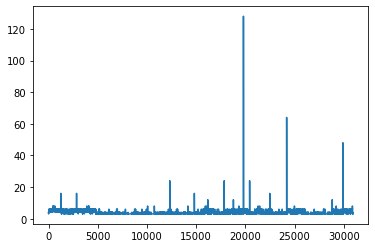

In [20]:
df['Vertical accuracy (degrees)'].plot()

In [21]:
index = df[df['Vertical accuracy (degrees)'] > 20].index.values
df = df.drop(index)
df.shape

(30915, 29)

### Horizontal Accuracy (Replace 30 with 10)

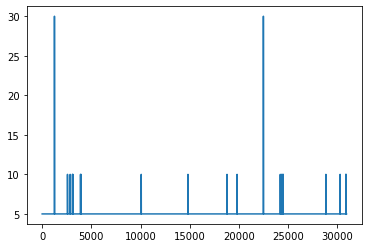

In [22]:
df['Horizontal accuracy (degrees)'].plot()

In [23]:
df['Horizontal accuracy (degrees)'] = df['Horizontal accuracy (degrees)'].replace(30,10)

### Difcourse: course variation (degrees), remove rows above 50

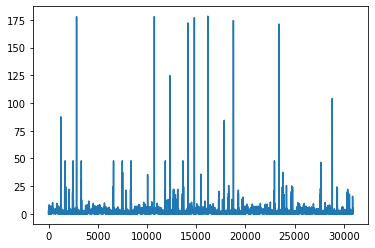

In [24]:
df['Difcourse: course variation (degrees)'].plot()

In [25]:
index = df[df['Difcourse: course variation (degrees)'] > 50].index.values
df = df.drop(index)
df.shape

(30901, 29)

### Car position (remove -9)

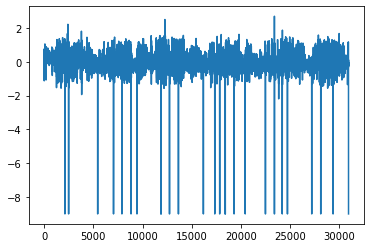

In [26]:
df['X: car position relative to lane center (meters)'].plot()

In [27]:
index = df[df['X: car position relative to lane center (meters)'] == -9].index.values
df = df.drop(index)
index = df[df['Phi: car angle relative to lane curvature (degrees)'] == -9].index.values
df = df.drop(index)
index = df[df['W: road width (meters)'] == -9].index.values
df = df.drop(index)
df.shape

(30740, 29)

In [28]:
df.describe(include='all')

,Speed (km/h),Latitude coordinate (degrees),Longitude coordinate (degrees),Altitude (meters),Vertical accuracy (degrees),Horizontal accuracy (degrees),Course (degrees),Difcourse: course variation (degrees),Boolean of system activated (1 if >50km/h),Acceleration in X filtered by KF (Gs),...,Distance to ahead vehicle in current lane (meters) [value -1 means no car is detected in front],Time of impact to ahead vehicle (seconds) [distance related to own speed],Number of detected vehicles in this frame (traffic),Maximum allowed speed of current road (km/h),"Reliability of obtained maxspeed (0=unknown, 1=reliable, 2=used previously obtained maxspeed,3=estimated by type of road)","Type of road (motorway, trunk, secondary...)",Number of lanes in current road,"Estimated current lane (1=right lane, 2=first left lane, 3=second left lane, etc) [experimental]",OSM delay to answer query (seconds),Behavior
count,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.0,30740.000000,...,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740,30740.000000,30740.000000,30740.000000,30740
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,motorway,NaN,NaN,NaN,NORMAL
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13707,NaN,NaN,NaN,12998
mean,94.365771,40.512068,-3.449900,625.195699,3.827391,5.005693,181.765494,1.881164,1.0,-0.013206,...,15.518980,0.092622,1.001757,99.313305,1.027944,NaN,2.317111,1.220852,5.005648,NaN
std,15.901867,0.039103,0.050715,45.281182,1.053439,0.168621,96.131392,2.779726,0.0,0.027200,...,26.357968,1.400153,1.032664,25.923023,0.565700,NaN,0.952614,0.726937,10.644077,NaN
min,47.000000,40.463497,-3.557913,568.300000,3.000000,5.000000,34.800000,0.000000,1.0,-0.198000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,NaN,-1.000000,-1.000000,-1.000000,NaN
25%,85.000000,40.471290,-3.483296,590.300000,3.000000,5.000000,89.300000,0.352000,1.0,-0.027000,...,-1.000000,-1.000000,0.000000,90.000000,1.000000,NaN,2.000000,1.000000,1.039000,NaN
50%,91.900000,40.504450,-3.450315,603.500000,4.000000,5.000000,167.300000,1.055000,1.0,-0.012000,...,-1.000000,-1.000000,1.000000,100.000000,1.000000,NaN,3.000000,1.000000,1.478000,NaN
75%,103.200000,40.548821,-3.410227,655.100000,4.000000,5.000000,269.300000,2.461000,1.0,0.002000,...,23.752500,0.910000,2.000000,120.000000,1.000000,NaN,3.000000,2.000000,2.745000,NaN


# Encoding Categorical Variables (Using get_dummies)
#### Enconding:
- 'Estimated current lane (1=right lane, 2=first left lane, 3=second left lane, etc) [experimental]'
- 'Reliability of obtained maxspeed (0=unknown, 1=reliable, 2=used previously obtained maxspeed,3=estimated by type of road)'
- 'State of the lane det. algorithm [-1=calibrating, 0=initializing, 1=undetected, 2=detected/running]'

### Estimated Current Lane

In [29]:
print(df['Estimated current lane (1=right lane, 2=first left lane, 3=second left lane, etc) [experimental]'].value_counts().sort_values(ascending=False))
print('\n')
print(df[df['Estimated current lane (1=right lane, 2=first left lane, 3=second left lane, etc) [experimental]'] == 0]['Behavior'].value_counts())
print('\n522 OUT OF 523 LANE IS NORMAL. IN ORDER TO PREVENT BIAS, LANE 0 AND -1 HAS TO BE COMBINED')

 1    20227
 2     7580
-1     1272
 3     1138
 0      523
Name: Estimated current lane (1=right lane, 2=first left lane, 3=second left lane, etc) [experimental], dtype: int64


NORMAL        522
AGGRESSIVE      1
Name: Behavior, dtype: int64

522 OUT OF 523 LANE IS NORMAL. IN ORDER TO PREVENT BIAS, LANE 0 AND -1 HAS TO BE COMBINED


In [30]:
dummies = pd.get_dummies(df['Estimated current lane (1=right lane, 2=first left lane, 3=second left lane, etc) [experimental]'], prefix = 'Estimated current lane', dummy_na = False)
dummies['Estimated current lane_-1'] = dummies['Estimated current lane_-1'] + dummies['Estimated current lane_0']
dummies = dummies.drop(columns = ['Estimated current lane_0'])

df = df.drop(columns = ['Estimated current lane (1=right lane, 2=first left lane, 3=second left lane, etc) [experimental]'])
df = pd.concat([df, dummies], axis = 1)

### Reliability

In [31]:
print(df['Reliability of obtained maxspeed (0=unknown, 1=reliable, 2=used previously obtained maxspeed,3=estimated by type of road)'].value_counts().sort_values(ascending=False))
print('\n')
print(df[df['Reliability of obtained maxspeed (0=unknown, 1=reliable, 2=used previously obtained maxspeed,3=estimated by type of road)'] == 0]['Behavior'].value_counts())
print('\nRELIABILITY 0 HAS TOO SMALL NUMBER OF SAMPLES. IN ORDER TO PREVENT BIAS, LANE 0 AND -1 HAS TO BE COMBINED')

 1    28043
 3     1374
-1     1014
 2      224
 0       85
Name: Reliability of obtained maxspeed (0=unknown, 1=reliable, 2=used previously obtained maxspeed,3=estimated by type of road), dtype: int64


DROWSY        66
NORMAL        14
AGGRESSIVE     5
Name: Behavior, dtype: int64

RELIABILITY 0 HAS TOO SMALL NUMBER OF SAMPLES. IN ORDER TO PREVENT BIAS, LANE 0 AND -1 HAS TO BE COMBINED


In [32]:
dummies = pd.get_dummies(df['Reliability of obtained maxspeed (0=unknown, 1=reliable, 2=used previously obtained maxspeed,3=estimated by type of road)'], prefix = 'Reliability of obtained maxspeed', dummy_na = False)
dummies['Reliability of obtained maxspeed_-1'] = dummies['Reliability of obtained maxspeed_-1'] + dummies['Reliability of obtained maxspeed_0']
dummies = dummies.drop(columns = ['Reliability of obtained maxspeed_0'])

df = df.drop(columns = ['Reliability of obtained maxspeed (0=unknown, 1=reliable, 2=used previously obtained maxspeed,3=estimated by type of road)'])
df = pd.concat([df, dummies], axis = 1)

### State of lane det

In [33]:
print(df['State of the lane det. algorithm [-1=calibrating, 0=initializing, 1=undetected, 2=detected/running]'].value_counts().sort_values(ascending=False))
print('\n')
print(df[df['State of the lane det. algorithm [-1=calibrating, 0=initializing, 1=undetected, 2=detected/running]'] == -9]['Behavior'].value_counts())
print('\n-9 HAS TOO SMALL NUMBER OF SAMPLES. IN ORDER TO PREVENT BIAS, LANE -9 AND -1 HAS TO BE COMBINED')

 2    26967
 1     2493
 0      988
-1      292
Name: State of the lane det. algorithm [-1=calibrating, 0=initializing, 1=undetected, 2=detected/running], dtype: int64


Series([], Name: Behavior, dtype: int64)

-9 HAS TOO SMALL NUMBER OF SAMPLES. IN ORDER TO PREVENT BIAS, LANE -9 AND -1 HAS TO BE COMBINED


In [34]:
dummies = pd.get_dummies(df['State of the lane det. algorithm [-1=calibrating, 0=initializing, 1=undetected, 2=detected/running]'], prefix = 'State of the lane det. algorithm', dummy_na = False)
dummies['State of the lane det. algorithm_-1'] = dummies['State of the lane det. algorithm_-1'] #+ dummies['State of the lane det. algorithm_-9']
# dummies = dummies.drop(columns = ['State of the lane det. algorithm_-9'])

df = df.drop(columns = ['State of the lane det. algorithm [-1=calibrating, 0=initializing, 1=undetected, 2=detected/running]'])
df = pd.concat([df, dummies], axis = 1)

### Special Case: Make additional column ['no car is detected in front'], '1' if no car detected in front

In [35]:
index = np.where(df['Distance to ahead vehicle in current lane (meters) [value -1 means no car is detected in front]'] == -1)
df['no car is detected in front'] = 0
for i in range(len(index[0])):
    df['no car is detected in front'][index[0][i]] = 1

<ipython-input-35-415ea9071a08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no car is detected in front'][index[0][i]] = 1


### Special Case: Make additional column ['no spped limit'], '1' if no spped limit

In [36]:
index = np.where(df['Maximum allowed speed of current road (km/h)'] == -1)
df['no speed limit'] = 0
for z in range(len(index[0])):
    df['no speed limit'][index[0][z]] = 1

<ipython-input-36-476e363c1621>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no speed limit'][index[0][z]] = 1


### Special Case: Make additional column ['Number of lanes in current road'], '1' if no lanes detected

In [37]:
index = np.where(df['Number of lanes in current road'] == -1)
df['no lanes number'] = 0
for z in range(len(index[0])):
    df['no lanes number'][index[0][z]] = 1

<ipython-input-37-fadf6141507b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no lanes number'][index[0][z]] = 1


In [38]:
df.head(5)

,Speed (km/h),Latitude coordinate (degrees),Longitude coordinate (degrees),Altitude (meters),Vertical accuracy (degrees),Horizontal accuracy (degrees),Course (degrees),Difcourse: course variation (degrees),Boolean of system activated (1 if >50km/h),Acceleration in X filtered by KF (Gs),...,Reliability of obtained maxspeed_1,Reliability of obtained maxspeed_2,Reliability of obtained maxspeed_3,State of the lane det. algorithm_-1,State of the lane det. algorithm_0,State of the lane det. algorithm_1,State of the lane det. algorithm_2,no car is detected in front,no speed limit,no lanes number
0,64.5,40.512924,-3.404577,612.5,4,5,331.9,0.000,1,-0.030,...,1,0,0,1,0,0,0,0,0,0
1,63.6,40.513065,-3.404680,612.9,4,5,330.8,1.055,1,0.026,...,1,0,0,1,0,0,0,0,0,0
2,62.2,40.513210,-3.404772,613.3,4,5,330.8,1.055,1,-0.021,...,1,0,0,0,0,0,1,0,0,0
3,60.9,40.513348,-3.404868,613.5,3,5,330.1,0.703,1,0.025,...,1,0,0,0,0,0,1,0,0,0
4,61.2,40.513477,-3.404971,613.8,3,5,329.4,1.406,1,0.014,...,1,0,0,0,0,0,1,0,0,0


# Enconding Object Features

### Type of Road

In [39]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}' unique categories".format(
        col_name = col_name, unique_cat = unique_cat))
        
print(df['Type of road (motorway, trunk, secondary...)'].value_counts().sort_values(ascending=False))
print('\n')
print(df[df['Type of road (motorway, trunk, secondary...)'] == 'track']['Behavior'].value_counts())
print('\n"-,track,construction,tertiary,secondary,unclassified" MUST BE COMBINED')

Feature 'Type of road (motorway, trunk, secondary...)' has '11' unique categories
Feature 'Behavior' has '3' unique categories
motorway         13707
primary          12587
primary_link      1700
motorway_link     1380
-                 1014
tertiary_link      238
track               63
construction        22
tertiary            15
secondary            9
unclassified         5
Name: Type of road (motorway, trunk, secondary...), dtype: int64


DROWSY        44
NORMAL        14
AGGRESSIVE     5
Name: Behavior, dtype: int64

"-,track,construction,tertiary,secondary,unclassified" MUST BE COMBINED


In [40]:
dummies = pd.get_dummies(df['Type of road (motorway, trunk, secondary...)'], 
                         prefix = 'Type of road', dummy_na = False)

In [41]:
dummies['Type of road_Others'] = dummies['Type of road_-'] +\
                                 dummies['Type of road_construction'] +\
                                 dummies['Type of road_secondary'] +\
                                 dummies['Type of road_tertiary'] +\
                                 dummies['Type of road_track'] +\
                                 dummies['Type of road_unclassified']

In [42]:
dummies = dummies.drop(columns = ['Type of road_-'])
dummies = dummies.drop(columns = ['Type of road_construction'])
dummies = dummies.drop(columns = ['Type of road_secondary'])
dummies = dummies.drop(columns = ['Type of road_tertiary'])
dummies = dummies.drop(columns = ['Type of road_track'])
dummies = dummies.drop(columns = ['Type of road_unclassified'])

In [43]:
df = df.drop(columns = ['Type of road (motorway, trunk, secondary...)'])
df = pd.concat([df, dummies], axis = 1)

### Encoding Behavior

In [44]:
dummies = pd.get_dummies(df['Behavior'])
df = df.drop(columns = ['Behavior'])
df = pd.concat([df, dummies], axis = 1)

# Removing Excessive Features to Avoid Multicolinearity

In [45]:
df = df.drop(columns = ['Estimated current lane_-1'])
df = df.drop(columns = ['Reliability of obtained maxspeed_-1'])
df = df.drop(columns = ['State of the lane det. algorithm_-1'])
df = df.drop(columns = ['Type of road_Others'])
df.shape

(30740, 44)

# Heatmap and Correlation Table

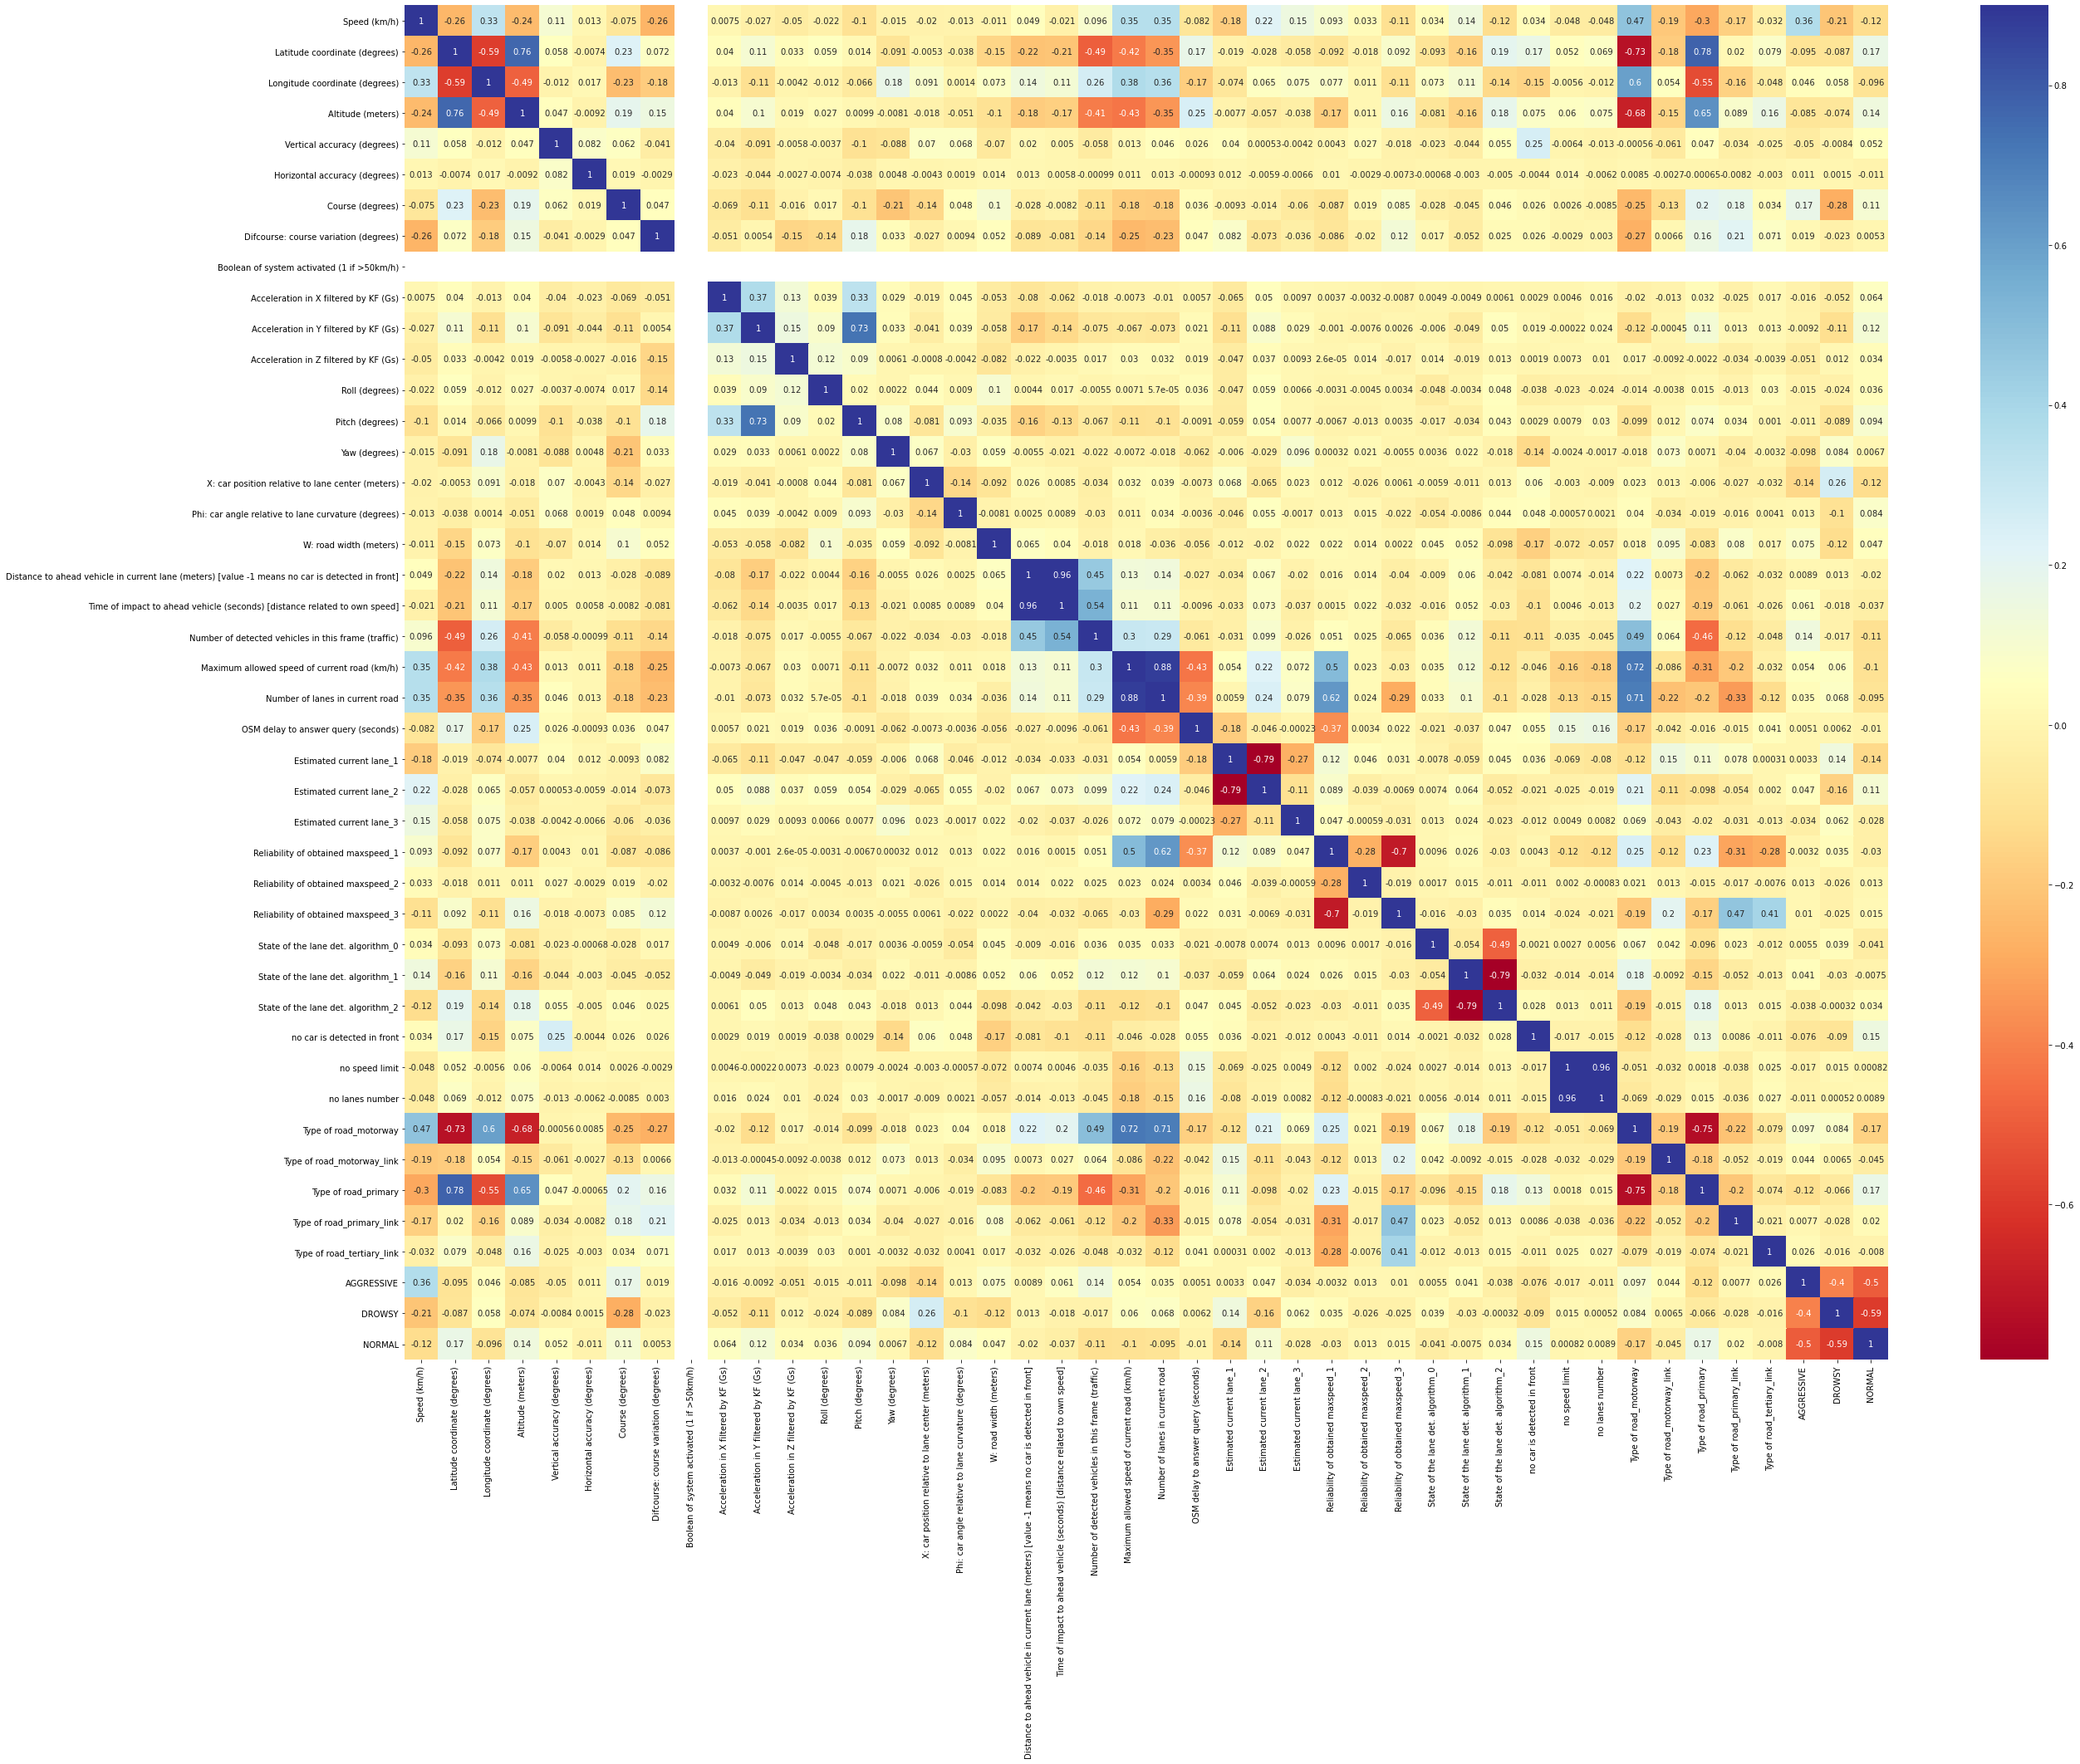

In [46]:
from matplotlib import pyplot
import seaborn as sns

numeric_feast = df.dtypes.index
cormat = df[numeric_feast].corr()
pyplot.subplots(figsize = (40,30))
sns.heatmap(cormat, vmax=0.9, annot=True, cmap="RdYlBu")

In [47]:
corr = df[numeric_feast].corr().iloc[-3:,:-3]
abs(corr)

,Speed (km/h),Latitude coordinate (degrees),Longitude coordinate (degrees),Altitude (meters),Vertical accuracy (degrees),Horizontal accuracy (degrees),Course (degrees),Difcourse: course variation (degrees),Boolean of system activated (1 if >50km/h),Acceleration in X filtered by KF (Gs),...,State of the lane det. algorithm_1,State of the lane det. algorithm_2,no car is detected in front,no speed limit,no lanes number,Type of road_motorway,Type of road_motorway_link,Type of road_primary,Type of road_primary_link,Type of road_tertiary_link
AGGRESSIVE,0.364519,0.094542,0.046208,0.085345,0.049943,0.011231,0.174071,0.019053,NaN,0.016184,...,0.040535,0.037722,0.076068,0.016986,0.010690,0.096935,0.044004,0.118814,0.007668,0.025808
DROWSY,0.210012,0.086981,0.058026,0.073515,0.008436,0.001496,0.278350,0.023371,NaN,0.052464,...,0.029869,0.000321,0.089632,0.014980,0.000521,0.084485,0.006532,0.065822,0.028221,0.015625
NORMAL,0.122958,0.165693,0.095658,0.144841,0.052045,0.011324,0.109717,0.005297,NaN,0.063907,...,0.007510,0.033586,0.151901,0.000817,0.008939,0.165443,0.045004,0.167093,0.019930,0.007990


In [48]:
abs(corr).sum().sort_values(ascending = False)

Speed (km/h)                                                                                       0.697489
Course (degrees)                                                                                   0.562138
X: car position relative to lane center (meters)                                                   0.519269
Type of road_primary                                                                               0.351729
Latitude coordinate (degrees)                                                                      0.347216
Type of road_motorway                                                                              0.346862
Estimated current lane_2                                                                           0.319534
no car is detected in front                                                                        0.317602
Altitude (meters)                                                                                  0.303702
Estimated current lane_1    

# Drop Boolean

In [49]:
df = df.drop(columns = ['Boolean of system activated (1 if >50km/h)'])

# Save to CSV

In [50]:
pd.options.display.max_columns = None

In [51]:
df

,Speed (km/h),Latitude coordinate (degrees),Longitude coordinate (degrees),Altitude (meters),Vertical accuracy (degrees),Horizontal accuracy (degrees),Course (degrees),Difcourse: course variation (degrees),Acceleration in X filtered by KF (Gs),Acceleration in Y filtered by KF (Gs),Acceleration in Z filtered by KF (Gs),Roll (degrees),Pitch (degrees),Yaw (degrees),X: car position relative to lane center (meters),Phi: car angle relative to lane curvature (degrees),W: road width (meters),Distance to ahead vehicle in current lane (meters) [value -1 means no car is detected in front],Time of impact to ahead vehicle (seconds) [distance related to own speed],Number of detected vehicles in this frame (traffic),Maximum allowed speed of current road (km/h),Number of lanes in current road,OSM delay to answer query (seconds),Estimated current lane_1,Estimated current lane_2,Estimated current lane_3,Reliability of obtained maxspeed_1,Reliability of obtained maxspeed_2,Reliability of obtained maxspeed_3,State of the lane det. algorithm_0,State of the lane det. algorithm_1,State of the lane det. algorithm_2,no car is detected in front,no speed limit,no lanes number,Type of road_motorway,Type of road_motorway_link,Type of road_primary,Type of road_primary_link,Type of road_tertiary_link,AGGRESSIVE,DROWSY,NORMAL
0,64.5,40.512924,-3.404577,612.5,4,5,331.9,0.000,-0.030,-0.015,0.008,-1.535,0.029,0.023,0.000,-0.000,3.500,18.13,1.01,3,60.0,2,0.869,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,63.6,40.513065,-3.404680,612.9,4,5,330.8,1.055,0.026,-0.012,-0.006,-1.523,0.022,0.025,0.000,-0.000,3.500,13.35,0.76,3,60.0,2,0.869,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,62.2,40.513210,-3.404772,613.3,4,5,330.8,1.055,-0.021,-0.018,0.036,-1.518,0.035,0.037,0.321,0.045,2.998,13.50,0.78,2,60.0,2,0.869,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,60.9,40.513348,-3.404868,613.5,3,5,330.1,0.703,0.025,0.006,0.065,-1.533,0.018,0.048,0.251,0.014,3.001,15.12,0.89,1,60.0,2,0.869,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,61.2,40.513477,-3.404971,613.8,3,5,329.4,1.406,0.014,-0.031,0.042,-1.560,0.022,0.060,0.081,0.053,3.076,15.55,0.91,1,60.0,2,0.869,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30920,61.0,40.505451,-3.356395,599.4,4,5,96.0,0.703,-0.052,-0.046,-0.023,-1.471,0.009,-0.507,-0.222,0.052,3.214,63.14,3.72,1,90.0,2,2.054,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
30921,56.3,40.505436,-3.356205,599.3,4,5,96.0,0.703,-0.036,-0.000,-0.015,-1.469,0.009,-0.509,-0.303,0.051,3.195,-1.00,-1.00,1,90.0,2,2.054,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
30922,53.7,40.505417,-3.356025,599.1,4,5,97.4,1.406,-0.004,-0.010,0.017,-1.504,0.012,-0.511,-0.242,0.068,3.118,63.48,4.26,1,90.0,2,2.054,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
30923,51.8,40.505394,-3.355858,598.9,3,5,97.4,1.406,0.009,-0.004,-0.005,-1.516,0.003,-0.514,-0.081,0.089,3.080,63.79,4.44,1,90.0,2,2.848,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [52]:
df.to_csv('Preprocessed Data 3 Mar 2021.csv')